# Presentation n°2: Multi-Layer Perceptrons (MLP) 
 Presented by: Mohamed Oussema BEN SLIMA - Ons BOUSBIH

## I- Multi-Layer Perceptrons:

## II- MLP for classifying randomly generated data:

In [7]:
from sklearn.datasets import make_blobs
X, Y = make_blobs(n_samples=3000, centers=3, n_features=2,random_state=0)

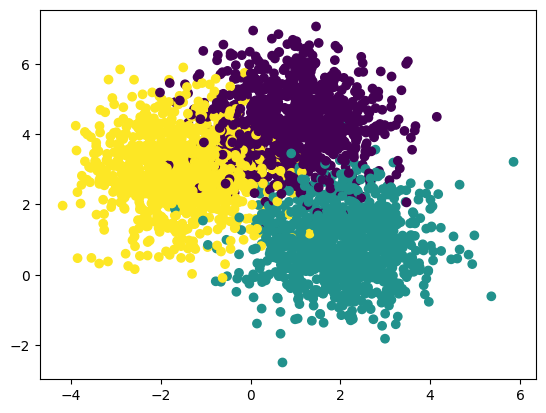

In [8]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=Y)

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,train_size=0.8,random_state=0)

In [10]:

from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)
print(y_pred.shape)
classifier.score(x_test,y_test)

(600,)


0.9066666666666666

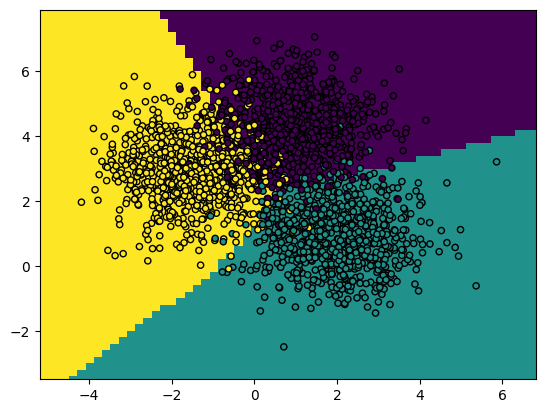

In [11]:
from matplotlib.colors import ListedColormap
import numpy as np

def plot_boundaries(classifier,X,Y,h=0.2):
    x0_min, x0_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x1_min, x1_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    x0, x1 = np.meshgrid(np.arange(x0_min, x0_max,h),
                         np.arange(x1_min, x1_max,h))
    dataset = np.c_[x0.ravel(),x1.ravel()]
    Z = classifier.predict(dataset)

    # Put the result into a color plot
    Z = Z.reshape(x0.shape)
    plt.figure()
    plt.pcolormesh(x0, x1, Z)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y,
                edgecolor='k', s=20)
    plt.xlim(x0.min(), x0.max())
    plt.ylim(x1.min(), x1.max())
plot_boundaries(classifier,x_train,y_train)

## III- MLP on Pyrat: